In [ ]:
# Hàm random
import random

print(random.random())
print(random.randint(1, 9))

0.3720339716874822
2


In [16]:
x, y = 10, 3
# Lấy giá trị của x chia với giá trị của y rồi lấy kết quả
print(x / y)
# Lấy giá trị của x chia với giá trị của y chỉ lấy phần nguyên
print(x // y)
# Lấy giá trị của x mũ y
print(x ** y)

3.3333333333333335
3
1000


In [17]:
# Example chuyển đổi độ C sang độ F
temp_c = float(input("Nhập nhiệt độ độ C: "))
print("Nhiệt độ F là: {}".format((temp_c * 9/5) + 32))

ValueError: could not convert string to float: ''

In [ ]:
def greet(name):
    print("Hello " + name + ", welcome to Python programming!")
greet("Nguyen")

def compute_rectangle_area(height, width):
    area = height * width
    return area
print(compute_rectangle_area(2, 3))

Hello Nguyen, welcome to Python programming!
6


In [ ]:
import math
def compute_length(selected_degree):
    sin = math.sin(math.radians(selected_degree))
    length = sin * (180 / selected_degree)

    return length
print(compute_length(18))

3.090169943749474


In [ ]:
import math
def compute_area(selected_degree):
    sin_degree = math.sin(math.radians(selected_degree))
    cos_degree = math.cos(math.radians(selected_degree))

    area_degree = sin_degree * cos_degree / 2
    area = (360 / selected_degree) * area_degree

    return area
print(compute_area(1))

3.1409547032250873


In [ ]:
def func(x):
    return x ** 2 + 2 * x
def compute_derivative(f, x, epsilon):
    return (f(x + epsilon) - f(x)) / epsilon
result = compute_derivative(func, 2.0, 1.0e-3)
print(result)

6.000999999999479


In [ ]:
# GPU hoạt động tốt dựa trên phép nhân nên khi chia trường hợp có thể tính sẽ tệ hơn 
# khi dùng Vector
import math
import numpy as np

def function(a, b):
    result = 0
    if a == 0: result = b ** 2
    elif a == 1: result = math.sqrt(b)
    else: result = b
    return result

# Lưu dưới dạng các one-hot vector -> Khử được if else -> Dùng GPU chạy nhanh hơn nhiều
def function_vector(a, b):
    vector_v = np.array([0, 0, 0])
    vector_v[a] = 1

    vector_u = np.array([b ** 2, math.sqrt(b), b])
    result = np.dot(vector_u, vector_v)
    return result

In [ ]:
# Overflow and Underflow
result = 1e-100
print(result)

result = 1e100
print(result)

# Underflow
result = 1e-1000
print(result)

# Overflow 
result = 1e1000
print(result)

1e-100
1e+100
0.0
inf


In [ ]:
# Softmax function để minh họa vấn đề Overflow
import math

v1, v2, v3 = 1.0, 2.0, 3.0
total = math.exp(v1) + math.exp(v2) + math.exp(v3)
s1 = math.exp(v1) / total
s2 = math.exp(v2) / total
s3 = math.exp(v3) / total

print(f"{s1:.5f} {s2:.5f} {s3:.5f}")

# Tăng giá trị v lên
v1, v2, v3 = 1001.0, 1002.0, 1003.0
total = math.exp(v1) + math.exp(v2) + math.exp(v3)
s1 = math.exp(v1) / total
s2 = math.exp(v2) / total
s3 = math.exp(v3) / total

print(f"{s1:.5f} {s2:.5f} {s3:.5f}")

0.09003 0.24473 0.66524


OverflowError: math range error

In [ ]:
'''
Khi x chạy từ âm đến dương vô cực -> e ** x chạy từ 0 đến dương vô cực
-> Giải pháp: Scale lại x = x - max -> x chạy từ âm vô cực đến 0 -> e ** x chạy từ 0 đến 1
'''
import math
v1, v2, v3 = 1001.0, 1002.0, 1003.0

max_value = max(v1, v2, v3)

e_v1 = math.exp(v1 - max_value)
e_v2 = math.exp(v2 - max_value)
e_v3 = math.exp(v3 - max_value)

total = e_v1 + e_v2 + e_v3
s1 = e_v1 / total
s2 = e_v2 / total
s3 = e_v3 / total

print(f"{s1:.5f} {s2:.5f} {s3:.5f}")

# No free lunch theorem: Chúng ta chấp nhận việc underflow để giải quyết overflow

0.09003 0.24473 0.66524


In [22]:
# Compute quadratic root for the number N using Newton method
# range(start_value, stop_value, step_size)
def compute_quadratic(n):
    a = []
    x_0 = n / 2
    a.append(x_0)
    for i in range(1,10):
        x_0 = (x_0 + n / x_0) / 2
        a.append(x_0)
    return a
print(compute_quadratic(16))

[8.0, 5.0, 4.1, 4.001219512195122, 4.0000001858445895, 4.000000000000004, 4.0, 4.0, 4.0, 4.0]


In [27]:
# Insert into a string
value1 = "Nguyen Khoa Nguyen"
print("Hello %s. Have a nice day !" % value1)
value2 = "Hi"
print("*** %s %s ***" %(value2, value1))

print("{n1}, {n2}".format(n1 = value2, n2 = value1))

print(f'{value2}. My name is {value1}')

iteration = 5
loss = 48.2

print("Loss at the %d in iteration is %f" % (iteration, loss))

# %s: string
# %d: decimal
# %f: float


Hello Nguyen Khoa Nguyen. Have a nice day !
*** Hi Nguyen Khoa Nguyen ***
Hi, Nguyen Khoa Nguyen
Hi. My name is Nguyen Khoa Nguyen
Loss at the 5 in iteration is 48.200000


In [37]:
# Chuỗi là immutable nên phải gán kết quả sau khi dùng hàm
# Loại bỏ khoảng trắng ở cả hai đầu của chuỗi
mystr = " Tôi tên là Nguyễn Khoa Nguyên "
mystr = mystr.strip()
print(mystr)

# Thay thế chuỗi
mystr = "Đây là AI"
mystr = mystr.replace("AI", "AI22")
print(mystr)

# Tách chuỗi
mystr = "Đây là Nguyễn Khoa Nguyên"
mystr = mystr.partition("là")
print(mystr)

# Tìm vị trí của một string trong một string khác và trả về -1 nếu không tìm thấy
mystr = "Đây là bài học của AI VIET NAM"
print(mystr.find("học"))
print(mystr.find("Hello"))

# Tìm vị trí của một string trong một string khác và trả về ValueError nếu không tìm thấy
mystr = "Đây là bài học của AI VIET NAM"
print(mystr.index("học"))
print(mystr.index("hello"))

Tôi tên là Nguyễn Khoa Nguyên
Đây là AI22
('Đây ', 'là', ' Nguyễn Khoa Nguyên')
11
-1
11


ValueError: substring not found

In [39]:
# PI estimation
import random 
import math

# Tổng số điểm p được sinh ra
N = 100000

# Số điểm thuộc hình tròn
N_T = 0
 
# Sinh ra N điểm ngẫu nhiên
for i in range(N):
    # sinh ra x, y thuoc [-1, 1]
    x = random.random() * 2 - 1
    y = random.random() * 2 - 1
    x2 = x ** 2
    y2 = y ** 2
    if math.sqrt(x2 + y2) <= 1.0:
        N_T = N_T + 1
# Tinh PI
pi = (N_T / N) * 4
print(pi)

3.14108


STRING

In [ ]:
'''
A data structure is a storage that is used to store and organize data. It is a way of 
arranging data on a computer so that it can be accessed and updated efficiently
'''
str = 'From vinh.nguyen@aivn.edu.vn Sat Jan 5 09:14:16 2023'
atpos = str.find('@')
sppos = str.find(' ', atpos)
host = str[atpos + 1 : sppos]
print(host)

aivn.edu.vn


LIST

In [ ]:
# Slicing
# list[start:end:step]. Start (default) = 0, End (default) = len(list), Step (default) = 1
# => Print from start to end - 1

# Add an element
a = [1, 2, 3]
a.append(4)
a.insert(0, 4) # Insert 4 into index = 0

# Add a list of elements
data = [6, 5, 7, 1]
data.extend([9, 2]) # data = [6, 5, 7, 1, 9, 2]

# + and * operators
data1 = [1, 2, 3]
data2 = [2, 3, 4]
data = data1 + data2 # [1, 2, 3, 2, 3, 4]
data [6, 5]
data_m = data * 3 # [6, 5, 6, 5, 6, 5]

# sort() - sort(reverse = True)

# Deleting an element
data = [1, 2, 3]
data.pop(2) # Delete at index = 2
data.remove(1) # Xóa phần tử đầu tiên có giá trị là 1

# Delete elements
data = [1, 2, 3]
del data[1:3] # Xóa phần tử thứ 1 và 2
data.clear() # Xóa hết

# Trả về vị trí đầu tiên
data = [1, 2, 3]
data.index(1) # Trả về vị trí của phần từ đầu tiên có giá trị là 1

# Đảo ngược vị trí các phần tử
data.reverse()
data = data[::-1]

# Trả về số lần xuất hiện của một phần tử
num_of_7 = data.count(7) 

# Copy một list
data_copy = data.copy()

# sorted(aList) - Sắp xếp các phần tử
sorted_data = sorted(data, reverse=True)

# Tính tổng các phần tử
summation = sum(data)

# Hàm zip(): perform parallel iterations on multiple iterables
data1 = [1, 2, 3]
data2 = [5, 6, 7]

for v1, v2 in zip(data1, data2):
    print(v1, v2) # (1 5) -> (2 6) -> (3 7)
    print(type(v1, v2))

# Reversed()
data = [6, 1, 7]
for value in reversed(data):
    print(value)

# Enumerate(): Lấy index và value cùng 1 thời điểm
data = [6, 1, 7]
for idx, val in enumerate(data):
    print(idx, val)



LIST COMPREHENSION

In [ ]:
#  [condition_to_branch_x for x in data condition_to_filter_x]
# Branch: có phần tử rồi, giờ phải làm gì với nó => bắt buộc phải có else
# Filter: Chọn lựa có nên lấy phần tử từ nguồn data hay không

# Quiz 1
data = [1, 5, -4, 3, -2]
data_a = [x if x > 0 else 0 for x in data] # [1, 5, 0, 3, 0]

# Quiz 2: Python không biết làm gì nếu x <= 0
data_a = [x if x > 0 for x in data] # Exception Error

# Quiz 3: Có nên cho phần tử x này đi tiếp vào danh sách hay không / chặn nếu không thỏa mãn
data_a = [x for x in data if x > 0] # [1, 5, 3]

# Quiz 4: Chức năng filter là giữ hoặc bỏ => không thể biến hình phần tử ở đây
data_a = [x for x in data if x > 0 else 0] # Exception Error

def square(data):
    result = []
    result = [value ** 2 for value in data]
    return result

import math
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
data = [1, 5, -4, 3, -2]
result = [sigmoid(value) for value in data]
print(result)

# ReLU function
def relu(x):
    result = [x if x > 0 else 0 for x in data]
    return result
result = relu(data)
print(result)

[0.7310585786300049, 0.9933071490757153, 0.01798620996209156, 0.9525741268224334, 0.11920292202211755]
[1, 5, 0, 3, 0]


MUTABLE / IMMUTABLE

In [42]:
# Mutable: We can change the value of a variable 
# Immutable: We can not change the value of a variable

# Tạo một list (Mutable)
my_list = [1, 2, 3]
print(f"ID ban đầu: {id(my_list)}") 

# Thay đổi nội dung: thêm số 4
my_list.append(4) 
print(f"ID sau khi sửa: {id(my_list)}")

# Kết quả: ID vẫn giữ nguyên, dù nội dung đã khác.
# [1, 2, 3, 4]

# Tạo một biến số nguyên (Immutable)
x = 10
print(f"ID của 10: {id(x)}")

# Cố gắng thay đổi x
x = x + 1 
# Python KHÔNG sửa số 10 thành 11.
# Python tạo ra số 11 ở chỗ khác, và gắn nhãn x vào đó.

print(f"ID của 11: {id(x)}")

# Kết quả: ID đã bị thay đổi -> Đây là object mới hoàn toàn.

# Tuple là immutable, nhưng List bên trong nó thì lại mutable!
tup = (1, 2, [3, 4])
tup[2].append(5) 
# Kết quả: (1, 2, [3, 4, 5]) -> Không lỗi.
# Tuple vẫn trỏ đúng vào cái list đó (không đổi ID), nhưng nội dung cái list thì phình to ra.

ID ban đầu: 2047464440576
ID sau khi sửa: 2047464440576
ID của 10: 140703871366344
ID của 11: 140703871366376


ALGORITHMS ON LIST

In [43]:
# Selection Sort
def Selection_Sort(data):
    for i in range(0, len(data) - 1):
        min_idx = i
        for j in range(i + 1, len(data)):
            if data[j] < data[i]:
                min_idx = j
        if i != min_idx: a[i], a[min_idx] = a[min_idx], a[i]
    return data

a = [2, 3, 1, 4]
Selection_Sort(data=a)
print(a)

# Quiz 1
var = 1
a_list = [0, 1, 2]
while var in a_list:
    print('Good morning !')
    # remove the first item
    a_list.pop(0)

# Quiz 2
data = [1, 2, 3]
data[1] = 5
print(data)

data = [] # Error
data[1] = 5
print(data)

# Quiz 3
a_list = [1, 2]
print(f'a list before is {a_list}')

for x in a_list:
    x = 20
print(f'a list after is {a_list}')



[1, 2, 3, 4]
Good morning !
Good morning !
[1, 5, 3]


IndexError: list assignment index out of range

COVERTING TO LIST

In [ ]:
# list(iterable) -> aList
name = 'AI'
data = list(name)
print(data)

data = list(range(4, 10))
print(data)

['A', 'I']
[4, 5, 6, 7, 8, 9]


PLOTTING A FUNCTION

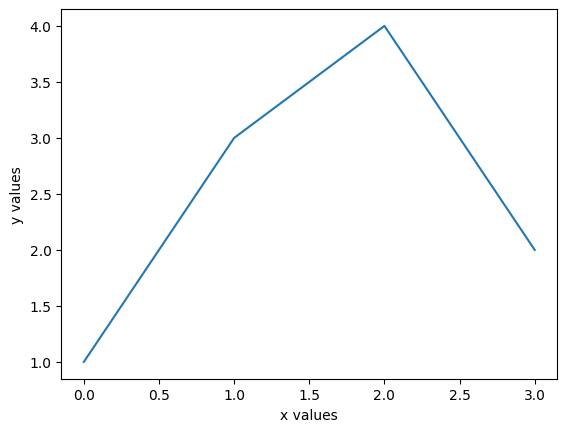

In [ ]:
# Using matplotlib
import matplotlib.pyplot as plt

# data 
x_data = [0, 1, 2, 3]
y_data = [1, 3, 4, 2]

# plot
plt.plot(x_data, y_data)
plt.ylabel('y values')
plt.xlabel('x values')

plt.show()

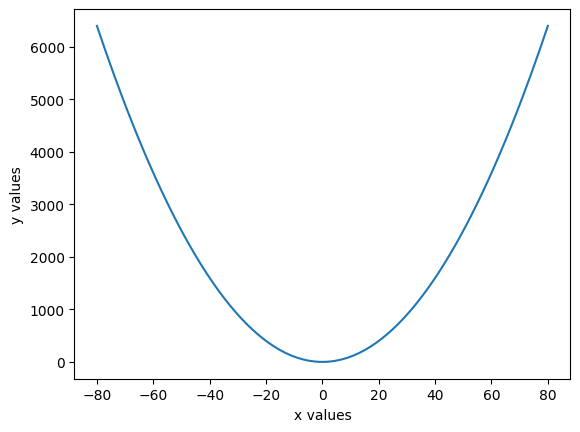

In [ ]:
# Visualize x [-8, 8] and y = x ** 2
x = list(range(-80, 81, 1))
y = [value ** 2 for value in x]
plt.plot(x, y)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

# => Problem: Everytime you run the program, x and y have to initialize
# => Solution: Store and load data from a memory

HOW TO HANDLE FILE IN PYTHON

In [ ]:
'''
open(<file>, <mode>)
- file: Relative or absolute path to the file (including the extension)
- mode: A string (character) that indicates what you want to do with the file

Typical procedure:
- Connect to file - open(file_path, 'w)
- Read from / write to file - write()
- Disconnect to file - close()
'''
# Write to a file - override
a_file = open('new_file.txt', 'w')
text1 = 'content in line 1 \n'
a_file.write(text1)
text2 = 'content in line 2\n'
a_file.write(text2)
a_file.close()

a_file = open('new_file.txt', 'a')
a_file.write('hehe')
a_file.close()

# Read from a file
a_file = open('new_file.txt', 'r')
data = a_file.read()
print(data)
a_file.close()

# Read every single line
a_file = open('new_file.txt', 'r')
lines = a_file.readlines()
for line in lines:
    print(line)
a_file.close()


content in line 1 
content in line 2
hehe


EXAMPLES: List and File

In [ ]:
# Read and Write from / to a log file
# Cơ chế tự động đóng file

# Write to a log file
with open(r'log.txt', 'w') as fp: # r: raw string (coi tất cả ký tự bên trong là ký tự bth)
    for item in data:
        fp.write(f'{item}\n')

# read for the log file
data = []
with open(r'log.txt', 'r') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip('\n')
        data.append(float(line))

VARIABLES AND ADDRESSES

In [ ]:
x = 20
y = x
print(id(x))
print(id(y))

print('----------------------------')

x = 20
y = x
x = 10
print(id(x))
print(id(y))

'''
- Immutable: ints, floats, strings, tuples (cannot be changed in place)
'''
print('----------------------------')
x = 'AI'
print(x)
print(id(x))

x = x + 'VIETNAM'
print(x)
print(id(x))
print('----------------------------')


a_list = [1, 2, 3]
print(a_list)
print(id(a_list))

a_list = a_list + [4, 5]
print(a_list)
print(id(a_list))
print('----------------------------')

a = 1
b = 2
print(id(a))
print(id(b))

print('----------------------------')

a = a + 2
b = b + 1
print(id(a))
print(id(b))

# Khi khởi tạo một biến bằng giá trị x, python sẽ khởi tạo cache gồm các integer gán địa
# chỉ cố định (caching integers)

140703871366664
140703871366664
----------------------------
140703871366344
140703871366664
----------------------------
AI
2046749239856
AIVIETNAM
2047463271984
----------------------------
[1, 2, 3]
2047463449024
[1, 2, 3, 4, 5]
2047463456704
----------------------------
140703871366056
140703871366088
----------------------------
140703871366120
140703871366120
----------------------------
2046749239856
2046749239856


QUIZZES

In [ ]:
# Quiz 1
index = 5
def my_function():
    print(index)
my_function()

# Quiz 2
index = 5
def my_function():
    data = index + 1
    print(index)
my_function()

# Quiz 3: Nếu tên biến local = tên biến global => ưu tiên local hơn => Error
index = 5
def my_function():
    index = index + 1
    print(index)
my_function()

# Quiz 4
index = 5
def my_function(index):
    index = index + 1
    print(index)
my_function(7)

5
5
8


TUPLE

In [ ]:
# Problem in using List
def getFirstLastName(name):
    list = name.split()
    return [list[2], list[0]]
name = 'Nguyen Khoa Nguyen'
result = getFirstLastName(name)
result[0] = 'Unknown'
result[1] = 'Unknown'
print(result)

# Solve by Tuples
def getFirstLastName(name):
    list = name.split()
    return (list[2], list[0])
name = 'Nguyen Khoa Nguyen'
result = getFirstLastName(name)
result[0] = 'Unknown' # Error
result[1] = 'Unknown'
print(result)


['Unknown', 'Unknown']


TypeError: 'tuple' object does not support item assignment

In [20]:
# Tuple unpacking
x1, x2, x3 = ('a', 'b', 'c')
print(x1)
(x1, x2, x3) = (1, 2, 3)

t = 1, 2
print(t)
print(type(t))

t = (1, 2, [3, 10])
t[2][1] = 0
print(t)

# Swapping
t = 3
s = 2
t, s = s, t

# Tuple slicing
data = (1, 2, 3, 4, 5)
print(data[:2])
print(data[::-1])

# Memory requirement
import sys
aList = [1, 2, 3, 4, 5]
aTuple = (1, 2, 3, 4, 5)
print(sys.getsizeof(aList))
print(sys.getsizeof(aTuple))

a
(1, 2)
<class 'tuple'>
(1, 2, [3, 0])
(1, 2)
(5, 4, 3, 2, 1)
104
80


In [21]:
'''
Look back to Iteration in Python
- When writing computer programs, you often need to repeat a given piece of code multiple 
times. To do this, you can follow one of the following approaches:
+ Repeating the target code as many times as you need in a sequence
+ Putting the target code in a loop that runs as many times as you need

- Iterable: cho phép thao tác để duyệt từng phần tử (string, list)
'''
# Other solution to access elements in the List rather than using for loop
# define a iterable such as a list
list1 = [0, 1, 2]
# get an iterator using iter()
iter1 = list1.__iter__()
# iterate the item using __next__ method
print(iter1.__next__())
print(iter1.__next__())
print(iter1.__next__())


0
1
2


In [ ]:
# Example: Solve quadratic equation
import math
def quadratic_equation(a, b, c):
    delta = b ** 2 - 4 * a * c
    if delta < 0:
        return ()
    elif delta == 0:
        x = (-b)/(2 * a)
        return (x,)
    else:
        x1 = (-b + math.sqrt(delta))/(2*a)
        x2 = (-b - math.sqrt(delta))/(2*a)
        return (x1, x2)


In [ ]:
# Tuple in Object Detection
def compute_IoU(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = max(boxA[2], boxB[2])
    yB = max(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of union rectangle
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    iou = interArea / float(boxAArea + boxBArea)
    return iou

'''
# Non-maximum Suppresion (NMS)
- Input: List P of prediction BBoxes of the form (x1, y1, x2, y2, c) where (x1, y1) and 
(x2, y2) are the location of the BBox and c is the predicted confidence of the model
- Output: Return a list keep of filtered prediction BBoxes

Step 1: Select the prediction S with highest confidence score and remove it from P and 
add it to the final prediction list keep (keep is empty initially)

Step 2: Now compare this prediction S with all the predictions present in P. Calculate the
IoU of this prediction S with every other predictions from P. If the IoU is greater than
the threshold thresh_iou for any prediction T present in P, remove prediction T from P
'''


SET

In [ ]:
# Problem in List: how to define a list that only includes unique elements => SET
# SET is unordered and unindexed

# Create a set (using curly brackets)
animals = {'cat', 'dog', 'tiger'}
print(type(animals))
print(animals)

a_set = {'cat', 'dog', 1, 1, 3, 'cat', 40.0}
print(a_set)

# Set comprehension
a_set = [i * i if i % 2 == 0 else i for i in range(10)]
print(a_set)

# Add an item
animals = {'cat', 'dog', 'tiger'}
animals.add('bear')
print(animals)

# Join two sets
set1 = {'cat', 'dog'}
set2 = {'duck', 'tiger'}
set3 = set1.union(set2)
print(set3)

# Insert a set to another set
animals.update(set1)

# Difference function
set1 = {'cat', 'dog'}
set2 = {'duck', 'tiger'}
set3 = set1.difference(set2) # Has a return value

# Difference_update function
set1.difference_update(set2) # No return value

# Symmetric_difference
set1 = {'apple', 'banana', 'cherry'}
set2 = {'pineapple', 'apple'}
set3 = set1.symmetric_difference(set2) # {'pineapple', 'cherry', 'banana'}

# Symmetric_difference_update
set1.symmetric_difference_update(set2)

# Bitwise operator
set1 = {1, 2, 3}
set2 = {3, 4, 5}
print(set1 & set2) # {3}
print(set1 | set2) # {1, 2, 3, 4, 5} 

# XOR ~ Symmetric difference
print(set1 ^ set2) # {1, 2, 4, 5}

# Subtraction
print(set1 - set2) # {1, 2}

# Remove an item
animals = {'cat', 'dog', 'tiger'}
animals.remove('dog') # if element does not exist => error

# Remove an item from the set if it is present 
animals.discard('tiger') # if element does not exist => no error


<class 'set'>
{'tiger', 'dog', 'cat'}
{1, 3, 'dog', 'cat', 40.0}
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
{'tiger', 'bear', 'dog', 'cat'}
{'duck', 'tiger', 'dog', 'cat'}
{3}
{1, 2, 3, 4, 5}
{1, 2, 4, 5}
{1, 2}


In [ ]:
# Set cannot contain unhashable types
'''
- Unhashable: Set chỉ chứa phần tử unique, nếu chứa list thì cơ chế nào đảm bảo phần tử
set là unique ? 
=> Khi khởi tạo một kiểu dữ liệu sẽ có 1 định danh (CCCD) không thay đổi trong suốt quá
trình thực thi chương trình

- A hashable Python object is any object that has a hash value - an integer identificator
of that object which never changes during its lifetime. Most of python's immutable 
built-in objects are hashable; mutable container (lists) are unhashable
'''
a_list = [1, 2, 3]
a_set = {'cat', a_list}
print(a_set)

# convert a list to set
aList = [1, 2, 3, 2, 1]
aSet = set(aList)
print(aSet)

# convert a tuple to set

{1, 2, 3}


In [49]:
# Case study 1: Finding a List of unique words from data.txt
a_file = open('data.txt', 'r')
data = a_file.read()
print(data)
a_file.close()

data = data.replace('.', '')
data = data.replace(',','')
data = data.replace('-', ' ')
data = data.lower()

data = data.split()
data = set(data)
for index, word in enumerate(data):
    print(index, word)


Python is a high-level, interpreted, general-purpose programming language. Its design 
philosophy emphasizes code readability with the use of significant identation. Python
is dynamically-typed and garbage-collected. It supports multiple programming paradigms,
including structured, object-oriented and functional programming.
0 its
1 significant
2 collected
3 of
4 object
5 high
6 a
7 structured
8 multiple
9 dynamically
10 typed
11 identation
12 python
13 supports
14 garbage
15 design
16 is
17 general
18 readability
19 code
20 philosophy
21 oriented
22 including
23 programming
24 interpreted
25 functional
26 with
27 emphasizes
28 paradigms
29 the
30 purpose
31 level
32 and
33 use
34 language
35 it


DICTIONARY

In [ ]:
'''
Problem in a List, Set
- We want to store following parameters for YOLO machine learning-based algorithms: batch
size, learning rate, momentum, decay. Which data structure can we use ?
'''
dicts = {
    'learning rate' : 0.001,
    'batch_size' : 1,
    'momentum' : 0.9,
    'decay' : 0.0005
}
lr = dicts['learning rate']
print(lr)

# Dictionaries are like lists except that they use keys instead of numbers to look up values

# dict comprehension
a_dict = {str(i):i for i in range(5)}
print(a_dict)

# zip function
list1 = [1, 2, 3]
list2 = [2, 3, 4]
a = dict(zip(list1, list2))
print(a)

# Update a value
parameters = {
    'learning rate' : 0.001,
    'batch_size' : 1,
    'momentum' : 0.9,
    'decay' : 0.0005
}
parameters['learning rate'] = 0.002

# Get keys and values
keys = parameters.keys()
for key in keys:
    print(key)
values = parameters.values()
for key, value in parameters.items():
    print(key, value)

# Get a value by a key using get()
value = parameters.get('learning rate')
print(value)

# Get value and delete corresponding item
value = parameters.pop('learning rate')
print(value)

print('\nAfter using pop() function')
print(parameters)

# popitem(): Lấy ra một phần tử ở cuối dictionary
item = parameters.popitem()

# Key that does not exist
parameters = {
    'learning rate' :  0.1,
    'metric' : 'Accuracy'
}
del parameters['algorithm'] # => Error
value = parameters.pop('algorithm') # => Error

# Solution: get()

# setdefault() function
fruits = {
    'banana' : 2
}
fruits.setdefault('apple', 0)
print(fruits) # {'banana' : 2, 'apple' : 0}

# Merge two dicts 
fruits = {'banana' : 2, 'apple' : 4}
cereal = {'rice' : 3, 'corn': 7}
result = {**fruits, **cereal}
print(result)


0.001
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}
{1: 2, 2: 3, 3: 4}
learning rate
batch_size
momentum
decay
learning rate 0.002
batch_size 1
momentum 0.9
decay 0.0005
0.002
0.002

After using pop() function
{'batch_size': 1, 'momentum': 0.9, 'decay': 0.0005}


KeyError: 'algorithm'

In [ ]:
# Hàm copy() chỉ sao chép kiểu shallow copy
d1 = {
    'a' : [1, 2],
    'b' : 5
}
d2 = d1.copy()
# Thay đổi giá trị d2 sẽ ảnh hưởng đến d1
d2['a'][0] = 3
d2['a'][1] = 4
print('d1: ', d1)
print('d2: ', d2)

# Sử dụng hàm deepcopy() trong module copy
import copy
d1 = {
    'a' : [1, 2],
    'b' : 5
}
d2 = copy.deepcopy(d1)
d2['a'][0] = 3
d2['a'][1] = 4
print('d1: ', d1)
print('d2: ', d2)


d1:  {'a': [3, 4], 'b': 5}
d2:  {'a': [3, 4], 'b': 5}
d1:  {'a': [1, 2], 'b': 5}
d2:  {'a': [3, 4], 'b': 5}


['python', 'is', 'a', 'high', 'level', 'interpreted', 'general', 'purpose', 'programming', 'language', 'its', 'design', 'philosophy', 'emphasizes', 'code', 'readability', 'with', 'the', 'use', 'of', 'significant', 'identation', 'python', 'is', 'dynamically', 'typed', 'and', 'garbage', 'collected', 'it', 'supports', 'multiple', 'programming', 'paradigms', 'including', 'structured', 'object', 'oriented', 'and', 'functional', 'programming']
{'python': 2, 'is': 2, 'a': 1, 'high': 1, 'level': 1, 'interpreted': 1, 'general': 1, 'purpose': 1, 'programming': 3, 'language': 1, 'its': 1, 'design': 1, 'philosophy': 1, 'emphasizes': 1, 'code': 1, 'readability': 1, 'with': 1, 'the': 1, 'use': 1, 'of': 1, 'significant': 1, 'identation': 1, 'dynamically': 1, 'typed': 1, 'and': 2, 'garbage': 1, 'collected': 1, 'it': 1, 'supports': 1, 'multiple': 1, 'paradigms': 1, 'including': 1, 'structured': 1, 'object': 1, 'oriented': 1, 'functional': 1}


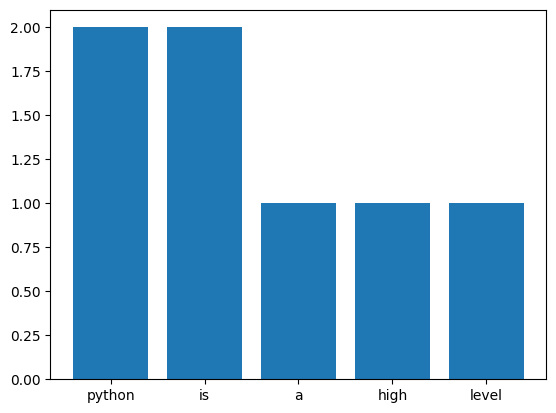

In [92]:
# Case study: Find frequency of each word in a paragraph
import matplotlib.pyplot as plt
a_file = open('data.txt', 'r')
data = a_file.read()
#print(data)
a_file.close()

data = data.replace('.', '')
data = data.replace(',', '')
data = data.replace('-', ' ')
data = data.lower()
#print(data)

data = data.split()
print(data)
a_dict = {}
for value in data:
    a_dict[value] = a_dict.get(value, 0) + 1
print(a_dict)

names = list(a_dict.keys())
values = list(a_dict.values())
plt.bar(range(5), values[:5], tick_label = names[:5])
plt.show()

LAMBDA FUNCTION


In [1]:
# Syntax: lambda arguments : expression
a_lfunction = lambda v : v + 10
print(a_lfunction(5))

a_lfunction = lambda v1, v2 : v1 + v2
print(a_lfunction(10, 15))

list1 = ['a', 'g', 'e', 'h', 'b']
list2 = [16, 13, 18, 11, 15]

list3 = list(zip(list1, list2))
print(list3)

list4 = sorted(list3, key = lambda item : item[1])
print(list4)

list5 = sorted(list3, key = lambda item : item[0])
print(list5)

15
25
[('a', 16), ('g', 13), ('e', 18), ('h', 11), ('b', 15)]
[('h', 11), ('g', 13), ('b', 15), ('a', 16), ('e', 18)]
[('a', 16), ('b', 15), ('e', 18), ('g', 13), ('h', 11)]
